In [24]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [25]:
## MUST be set to prevent ellipse in large arrays
np.set_printoptions(threshold = 10000)

In [26]:
# masks_path = './locating-objects-without-bboxes/data/512_512/masks/train/'
# masks_path = './locating-objects-without-bboxes/data/512_512/masks/test/'
masks_path = './locating-objects-without-bboxes/data/512_512/masks/val/'

In [27]:
masks = os.listdir(masks_path)

In [28]:
data = []

In [29]:
def fix_coordinates(centroids):    
    # Array to store (x, y) swapped as (y, x)
    swapped_coordinates = []
    
    for coord in centroids:
        swapped_coordinates.append((coord[1], coord[0]))
   
    return np.array(swapped_coordinates)
    

In [30]:
for mask in masks:
    #print("Image name: ", mask)
    mask_img = cv2.imread(os.path.join(masks_path, mask), cv2.IMREAD_GRAYSCALE)
    # Threshold mask
    mask_img = cv2.threshold(mask_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
#     _, mask_img = cv2.threshold(mask_img, 125, 255, cv2.THRESH_BINARY)
    
    process_img_name = re.sub("_mask", "", mask )
    #print("Processed Image name: ", process_img_name)
    
    output = cv2.connectedComponentsWithStats(mask_img)
    (numLabels, labels, stats, centroids) = output
    
    # Ignore the centroid of the background
    centroids = centroids [1:, :]
    
    centroids = fix_coordinates(centroids)
    
    centroids = np.array2string(centroids, separator=',')
    
    data.append([process_img_name, numLabels, centroids])

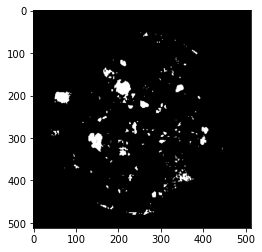

In [31]:
plt.imshow(mask_img, cmap="gray")

In [32]:
print(data)

[['20_lewisseth.png', 159, '[[ 39.64835165,270.69230769],\n [ 79.22222222,265.44444444],\n [ 79.33333333,261.66666667],\n [ 92.67731629,235.53674121],\n [ 84.27272727,298.27272727],\n [ 95.33333333,220.5       ],\n [100.5       ,216.        ],\n [101.73684211,258.10526316],\n [102.        ,277.5       ],\n [110.5       ,373.        ],\n [112.66666667,362.5       ],\n [125.14285714,210.07142857],\n [123.5       ,416.        ],\n [124.66666667,313.5       ],\n [130.        ,161.5       ],\n [131.66666667,220.5       ],\n [133.5       ,211.        ],\n [135.5       ,160.        ],\n [137.71428571,223.85714286],\n [139.38461538,277.07692308],\n [138.13333333,340.93333333],\n [138.66666667,379.33333333],\n [147.54938272,227.86419753],\n [146.53947368,315.22368421],\n [140.66666667,375.66666667],\n [140.66666667,382.66666667],\n [145.39130435,163.7173913 ],\n [142.5       ,379.        ],\n [144.        ,340.5       ],\n [146.71428571,378.28571429],\n [150.11111111,191.        ],\n [154.06511

In [33]:
data = np.array(data)
data = pd.DataFrame(data, columns = ['filename', 'count', 'locations']) 
data

,filename,count,locations
0,20_lewisseth.png,159,"[[ 39.64835165,270.69230769],\n [ 79.22222222,..."
1,17_runjalasunithaglory.png,337,"[[ 75.99137931,250.43103448],\n [ 77.95121951,..."
2,20_chaudharyamitlakshmikant.png,139,"[[ 36.91129032,269.02419355],\n [ 56.5 ,..."
3,19_sahapratim.png,318,"[[ 78.44721689,344.33973129],\n [ 82.48484848,..."
4,21_cheniminenihemanthi.png,113,"[[ 57.64583333,264.66666667],\n [ 68.66666667,..."
5,17_lakkireddybrunda.png,315,"[[ 71.54545455,252.66666667],\n [ 70.5 ,..."
6,18_sahapratim.png,270,"[[ 48.61371841,258.97833935],\n [ 51.5 ,..."
7,18_bungmahesh.png,251,"[[ 54.5 ,316. ],\n [ 56.5 ,..."
8,18_runjalasunithaglory.png,237,"[[ 51. ,242.5 ],\n [ 58. ,..."
9,19_bungmahesh.png,262,"[[ 43.5 ,266. ],\n [ 47.35135135,..."


In [34]:
# data.to_csv('./locating-objects-without-bboxes/data/512_512/images/train/gt.csv', index = False)

In [35]:
# data.to_csv('./locating-objects-without-bboxes/data/512_512/images/test/gt.csv', index = False)

In [36]:
data.to_csv('./locating-objects-without-bboxes/data/512_512/images/val/gt.csv', index = False)